In [2]:
! pip install numpy pandas scikit-learn catboost matplotlib seaborn phik nltk wordcloud imblearn tensorflow 

  Using cached numpy-2.2.6-cp310-cp310-win_amd64.whl.metadata (60 kB)
  Using cached pandas-2.3.2-cp310-cp310-win_amd64.whl.metadata (19 kB)
  Using cached scikit_learn-1.7.2-cp310-cp310-win_amd64.whl.metadata (11 kB)
  Using cached catboost-1.2.8-cp310-cp310-win_amd64.whl.metadata (1.5 kB)
  Using cached matplotlib-3.10.6-cp310-cp310-win_amd64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached phik-0.12.5-cp310-cp310-win_amd64.whl.metadata (5.6 kB)
  Using cached nltk-3.9.1-py3-none-any.whl.metadata (2.9 kB)
  Using cached wordcloud-1.9.4-cp310-cp310-win_amd64.whl.metadata (3.5 kB)
  Using cached imblearn-0.0-py2.py3-none-any.whl.metadata (355 bytes)
  Using cached tensorflow-2.20.0-cp310-cp310-win_amd64.whl.metadata (4.6 kB)
  Using cached scipy-1.15.3-cp310-cp310-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.5.2-py3-none-any.whl.metadata (5.6 kB)
  Using cached graphviz-0.21-py3-none-any.whl.metadata (12 kB)
  Using cached p

## Начало

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import nltk
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from helper import *
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from catboost import CatBoostClassifier
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from plots import *
import re

In [4]:
nltk.download('stopwords')
from nltk.corpus import stopwords

SEED = 42

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nemow\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
df = pd.read_csv('dataset.csv', index_col=0)

In [6]:
# df.drop(columns=['subject', 'date', 'text'], inplace=True)

In [7]:
df.head(10)

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [8]:
X, y = divide_data(df, 'target')

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=SEED, test_size=0.2)

X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=SEED, shuffle=True, stratify=None)

X_train = X_train['title']
X_test = X_test['title']
X_val = X_val['title']

X_train

36335    Turkey's Erdogan says U.S. Jerusalem decision ...
12384    BREAKING: Trump Reportedly Considering Ted Cru...
24419    Trump chief of staff's Civil War comment spark...
24740    Saudi Arabia welcomes new U.S. strategy toward...
27039    Trump arrives in Sicily ahead of Group of Seve...
                               ...                        
11284    UNREAL! CBS’S TED KOPPEL Tells Sean Hannity He...
44732    PM May seeks to ease Japan's Brexit fears duri...
38158    Merkel: Difficult German coalition talks can r...
860       Trump Stole An Idea From North Korean Propaga...
15795    BREAKING: HILLARY CLINTON’S STATE DEPARTMENT G...
Name: title, Length: 35918, dtype: object

## Preprocessing

In [10]:
def preprocessing(text):
    text = text.lower()
    
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = re.sub(r'https?://\S+|www\.\S+|[^a-zA-Z\s]', '', text)
    text = re.sub(r'<.*?>', '', text)
    
    return text

In [11]:
vectorized = np.vectorize(preprocessing)
x_train = vectorized(X_train)
x_test = vectorized(X_test)
x_val = vectorized(X_val)

print('the first 20 words of first train text after preprocessing:')
visualize = ''
counter = 0
for i in x_train[0].split(' '):
    visualize = visualize + i + " "
    if counter>20:
        break
    counter = counter + 1 
    
visualize

the first 20 words of first train text after preprocessing:


'turkey s erdogan says u s jerusalem decision tramples on law '

In [12]:
X_train

36335    Turkey's Erdogan says U.S. Jerusalem decision ...
12384    BREAKING: Trump Reportedly Considering Ted Cru...
24419    Trump chief of staff's Civil War comment spark...
24740    Saudi Arabia welcomes new U.S. strategy toward...
27039    Trump arrives in Sicily ahead of Group of Seve...
                               ...                        
11284    UNREAL! CBS’S TED KOPPEL Tells Sean Hannity He...
44732    PM May seeks to ease Japan's Brexit fears duri...
38158    Merkel: Difficult German coalition talks can r...
860       Trump Stole An Idea From North Korean Propaga...
15795    BREAKING: HILLARY CLINTON’S STATE DEPARTMENT G...
Name: title, Length: 35918, dtype: object

## Tokenizer

In [13]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)

train_seq = tokenizer.texts_to_sequences(x_train)
test_seq = tokenizer.texts_to_sequences(x_test)
val_seq = tokenizer.texts_to_sequences(x_val)

vocab_size = len(tokenizer.word_index) + 1
max_length = max(len(sequence) for sequence in train_seq)


train_seq = pad_sequences(train_seq, maxlen = max_length, padding = 'post', truncating = 'post')
test_seq = pad_sequences(test_seq, maxlen = max_length, padding = 'post', truncating = 'post')
val_seq = pad_sequences(val_seq, maxlen = max_length, padding = 'post', truncating = 'post')


In [14]:
train_seq

array([[ 188,    2,  711, ...,    0,    0,    0],
       [  68,    3, 1436, ...,    0,    0,    0],
       [   3,  121,    6, ...,    0,    0,    0],
       ...,
       [ 351, 3553,  254, ...,    0,    0,    0],
       [   3, 3071,  146, ...,    0,    0,    0],
       [  68,   18,   33, ...,    0,    0,    0]],
      shape=(35918, 44), dtype=int32)

## LSTM

сделаем простую lstm модель

In [15]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, Embedding, LSTM, Dropout, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import tensorflow as tf
import warnings


warnings.filterwarnings('ignore')


In [16]:
epochs = 10
lr = 1e-3
embedding_dim = 300
model = Sequential([
    Input(shape = (max_length,)),
    Embedding(vocab_size, embedding_dim, input_length = max_length, trainable = False),
    
    Bidirectional(LSTM(128, return_sequences = True)),
    Bidirectional(LSTM(64)),
    Dropout(0.2),
    
    Dense(256, activation = 'relu'),

    Dropout(0.5),
    
    Dense(1, activation = 'sigmoid')
])
 
model.compile(optimizer = Adam(learning_rate = lr), loss = BinaryCrossentropy(), metrics = ['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 44, 300)        │     5,751,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 44, 256)        │       439,296 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 128)            │       164,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,387,929 (24.37 MB)

 Trainable params: 636,929 (2.43 MB)

 Non-trainable params: 5,751,000 (21.94 MB)

In [17]:
tf.config.list_physical_devices('GPU')

[]

In [18]:
model_es = EarlyStopping(monitor = 'val_loss', mode = 'min', patience = 2, restore_best_weights = True)
model_rlr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience = 1, mode = 'min')


history = model.fit(train_seq, y_train, epochs = epochs, 
                    validation_data = (val_seq , y_val), callbacks = [model_es, model_rlr])

Epoch 1/10


1123/1123 ━━━━━━━━━━━━━━━━━━━━ 39s 31ms/step - accuracy: 0.8917 - loss: 0.2578 - val_accuracy: 0.9069 - val_loss: 0.2189 - learning_rate: 0.0010
Epoch 2/10
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 32s 29ms/step - accuracy: 0.9181 - loss: 0.2021 - val_accuracy: 0.9192 - val_loss: 0.1999 - learning_rate: 0.0010
Epoch 3/10
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 34s 31ms/step - accuracy: 0.9269 - loss: 0.1807 - val_accuracy: 0.9287 - val_loss: 0.1792 - learning_rate: 0.0010
Epoch 4/10
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 34s 30ms/step - accuracy: 0.9346 - loss: 0.1621 - val_accuracy: 0.9276 - val_loss: 0.1912 - learning_rate: 0.0010
Epoch 5/10
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 34s 30ms/step - accuracy: 0.9489 - loss: 0.1312 - val_accuracy: 0.9341 - val_loss: 0.1666 - learning_rate: 2.0000e-04
Epoch 6/10
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 35s 31ms/step - accuracy: 0.9508 - loss: 0.1223 - val_accuracy: 0.9383 - val_loss: 0.1664 - learning_rate: 2.0000e-04
Epoch 7/10
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 36s 32ms/step - accuracy:

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt


y_pred_train = np.round(model.predict(train_seq, verbose = 0))
y_pred_test = np.round(model.predict(test_seq, verbose = 0))


print(f'Train Accuracy : {accuracy_score(y_train, y_pred_train) * 100:.2f} %')
print(f'Test Accuracy  : {accuracy_score(y_test, y_pred_test) * 100:.2f} %')

Train Accuracy : 95.82 %
Test Accuracy  : 93.79 %


In [20]:
print(f'Classification Report (Train) : \n\n{classification_report(y_train, y_pred_train)}')
print(40*'-')
print(f'\nClassification Report (Test)  : \n\n{classification_report(y_test, y_pred_test)}')

Classification Report (Train) : 

              precision    recall  f1-score   support

           0       0.97      0.95      0.96     18748
           1       0.95      0.97      0.96     17170

    accuracy                           0.96     35918
   macro avg       0.96      0.96      0.96     35918
weighted avg       0.96      0.96      0.96     35918

----------------------------------------

Classification Report (Test)  : 

              precision    recall  f1-score   support

           0       0.95      0.94      0.94      2385
           1       0.93      0.94      0.93      2105

    accuracy                           0.94      4490
   macro avg       0.94      0.94      0.94      4490
weighted avg       0.94      0.94      0.94      4490



точность примерно такая же как у классической модели поверх TF-IDF 

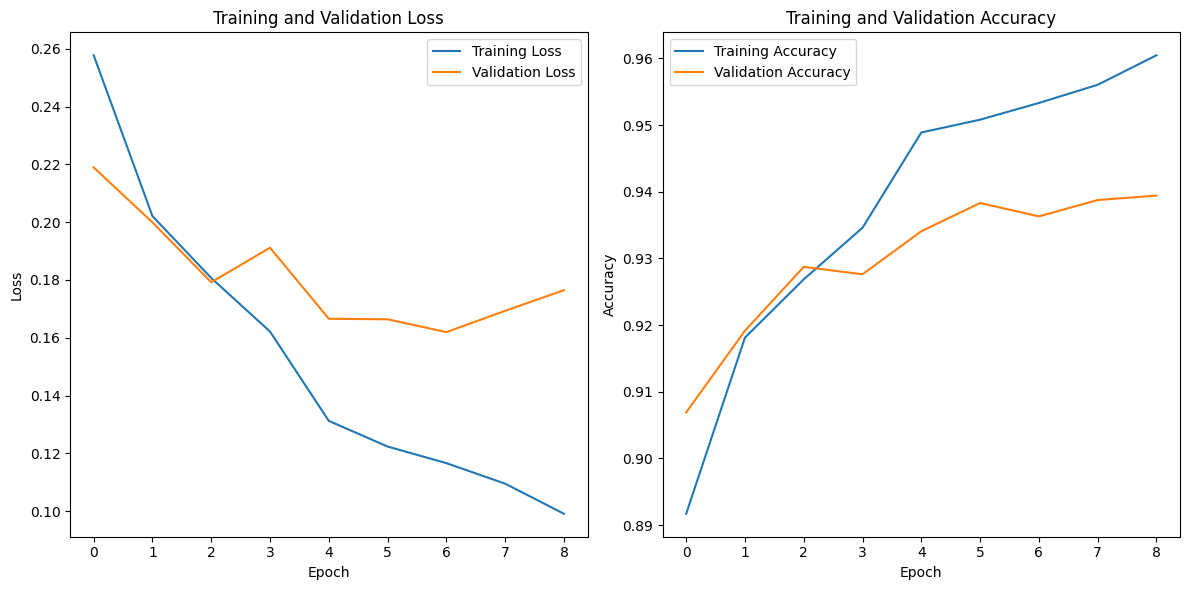

In [21]:
plt.figure(figsize = (12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

## SimpleRNN

In [22]:
from tensorflow.keras.layers import SimpleRNN

epochs = 10
lr = 1e-3
embedding_dim = 300

model = Sequential([
    Input(shape=(max_length,)),
    Embedding(vocab_size, embedding_dim, input_length=max_length, trainable=False),

    Bidirectional(SimpleRNN(128, return_sequences=True)),
    Bidirectional(SimpleRNN(64)),
    Dropout(0.2),

    Dense(256, activation='relu'),
    Dropout(0.5),

    Dense(1, activation='sigmoid')
])
 
model.compile(optimizer = Adam(learning_rate = lr), loss = BinaryCrossentropy(), metrics = ['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 44, 300)        │     5,751,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 44, 256)        │       109,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ (None, 128)            │        41,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,935,193 (22.64 MB)

 Trainable params: 184,193 (719.50 KB)

 Non-trainable params: 5,751,000 (21.94 MB)

In [23]:
model_es = EarlyStopping(monitor = 'val_loss', mode = 'min', patience = 2, restore_best_weights = True)
model_rlr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience = 1, mode = 'min')


history = model.fit(train_seq, y_train, epochs = epochs, 
                    validation_data = (val_seq , y_val), callbacks = [model_es, model_rlr])

Epoch 1/10
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 16s 12ms/step - accuracy: 0.8602 - loss: 0.3284 - val_accuracy: 0.8960 - val_loss: 0.2471 - learning_rate: 0.0010
Epoch 2/10
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 14s 12ms/step - accuracy: 0.9109 - loss: 0.2183 - val_accuracy: 0.9180 - val_loss: 0.2091 - learning_rate: 0.0010
Epoch 3/10
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 14s 12ms/step - accuracy: 0.9214 - loss: 0.1965 - val_accuracy: 0.9127 - val_loss: 0.2069 - learning_rate: 0.0010
Epoch 4/10
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - accuracy: 0.9264 - loss: 0.1813 - val_accuracy: 0.9254 - val_loss: 0.1977 - learning_rate: 0.0010
Epoch 5/10
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - accuracy: 0.9320 - loss: 0.1725 - val_accuracy: 0.9207 - val_loss: 0.1957 - learning_rate: 0.0010
Epoch 6/10
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - accuracy: 0.9366 - loss: 0.1576 - val_accuracy: 0.9290 - val_loss: 0.1919 - learning_rate: 0.0010
Epoch 7/10
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - accura

In [24]:
y_pred_train = np.round(model.predict(train_seq, verbose = 0))
y_pred_test = np.round(model.predict(test_seq, verbose = 0))


print(f'Train Accuracy : {accuracy_score(y_train, y_pred_train) * 100:.2f} %')
print(f'Test Accuracy  : {accuracy_score(y_test, y_pred_test) * 100:.2f} %')

print(f'Classification Report (Train) : \n\n{classification_report(y_train, y_pred_train)}')
print(40*'-')
print(f'\nClassification Report (Test)  : \n\n{classification_report(y_test, y_pred_test)}')

Train Accuracy : 95.36 %
Test Accuracy  : 93.05 %
Classification Report (Train) : 

              precision    recall  f1-score   support

           0       0.96      0.95      0.96     18748
           1       0.94      0.96      0.95     17170

    accuracy                           0.95     35918
   macro avg       0.95      0.95      0.95     35918
weighted avg       0.95      0.95      0.95     35918

----------------------------------------

Classification Report (Test)  : 

              precision    recall  f1-score   support

           0       0.95      0.92      0.93      2385
           1       0.91      0.94      0.93      2105

    accuracy                           0.93      4490
   macro avg       0.93      0.93      0.93      4490
weighted avg       0.93      0.93      0.93      4490



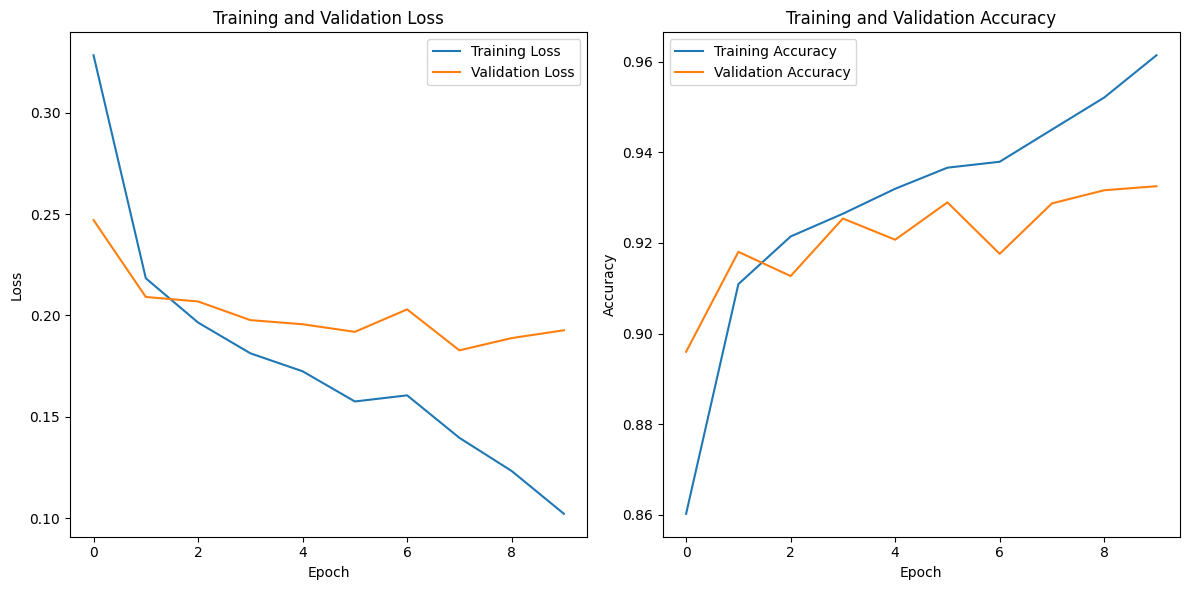

In [25]:
plt.figure(figsize = (12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

на 1-2% хуже LSTM, но обучаемых параметров в 5 раз меньше

## Glove6B

использую готовый embedding слой. использую RNN, как и в прошлый раз

In [26]:
embedding_index = {}
with open("glove.6B.300d.txt", encoding="utf8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], dtype="float32")
        embedding_index[word] = vector

print("Найдено векторов:", len(embedding_index))


Найдено векторов: 400000


In [27]:
embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in tokenizer.word_index.items():
    if i < vocab_size:
        vec = embedding_index.get(word)
        if vec is not None:
            embedding_matrix[i] = vec


In [28]:
epochs = 10
lr = 1e-3
embedding_dim = 300

model = Sequential([
    Input(shape=(max_length,)),
    Embedding(
        input_dim=vocab_size,
        output_dim=embedding_dim,
        weights=[embedding_matrix],
        input_length=max_length,
        trainable=False
    ),
    Bidirectional(SimpleRNN(128, return_sequences=True)),
    Bidirectional(SimpleRNN(64)),
    Dropout(0.2),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=Adam(learning_rate=lr),
    loss=BinaryCrossentropy(),
    metrics=["accuracy"]
)

model.summary()

model_es = EarlyStopping(monitor = 'val_loss', mode = 'min', patience = 2, restore_best_weights = True)
model_rlr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience = 1, mode = 'min')


history = model.fit(train_seq, y_train, epochs = epochs, 
                    validation_data = (val_seq , y_val), callbacks = [model_es, model_rlr])

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 44, 300)        │     5,751,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_4 (Bidirectional) │ (None, 44, 256)        │       109,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_5 (Bidirectional) │ (None, 128)            │        41,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,935,193 (22.64 MB)

 Trainable params: 184,193 (719.50 KB)

 Non-trainable params: 5,751,000 (21.94 MB)

Epoch 1/10
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 17s 13ms/step - accuracy: 0.9212 - loss: 0.1984 - val_accuracy: 0.9323 - val_loss: 0.1636 - learning_rate: 0.0010
Epoch 2/10
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 14s 12ms/step - accuracy: 0.9406 - loss: 0.1574 - val_accuracy: 0.8624 - val_loss: 0.3125 - learning_rate: 0.0010
Epoch 3/10
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 14s 12ms/step - accuracy: 0.9392 - loss: 0.1601 - val_accuracy: 0.9367 - val_loss: 0.1572 - learning_rate: 2.0000e-04
Epoch 4/10
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 14s 13ms/step - accuracy: 0.9549 - loss: 0.1179 - val_accuracy: 0.9486 - val_loss: 0.1328 - learning_rate: 2.0000e-04
Epoch 5/10
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 14s 12ms/step - accuracy: 0.9617 - loss: 0.1016 - val_accuracy: 0.9528 - val_loss: 0.1268 - learning_rate: 2.0000e-04
Epoch 6/10
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 14s 13ms/step - accuracy: 0.9659 - loss: 0.0880 - val_accuracy: 0.9557 - val_loss: 0.1219 - learning_rate: 2.0000e-04
Epoch 7/10
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 14s 13

In [29]:
y_pred_train = np.round(model.predict(train_seq, verbose = 0))
y_pred_test = np.round(model.predict(test_seq, verbose = 0))


print(f'Train Accuracy : {accuracy_score(y_train, y_pred_train) * 100:.2f} %')
print(f'Test Accuracy  : {accuracy_score(y_test, y_pred_test) * 100:.2f} %')

print(f'Classification Report (Train) : \n\n{classification_report(y_train, y_pred_train)}')
print(40*'-')
print(f'\nClassification Report (Test)  : \n\n{classification_report(y_test, y_pred_test)}')

Train Accuracy : 97.46 %
Test Accuracy  : 95.52 %
Classification Report (Train) : 

              precision    recall  f1-score   support

           0       0.97      0.98      0.98     18748
           1       0.98      0.97      0.97     17170

    accuracy                           0.97     35918
   macro avg       0.97      0.97      0.97     35918
weighted avg       0.97      0.97      0.97     35918

----------------------------------------

Classification Report (Test)  : 

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      2385
           1       0.96      0.95      0.95      2105

    accuracy                           0.96      4490
   macro avg       0.96      0.95      0.96      4490
weighted avg       0.96      0.96      0.96      4490



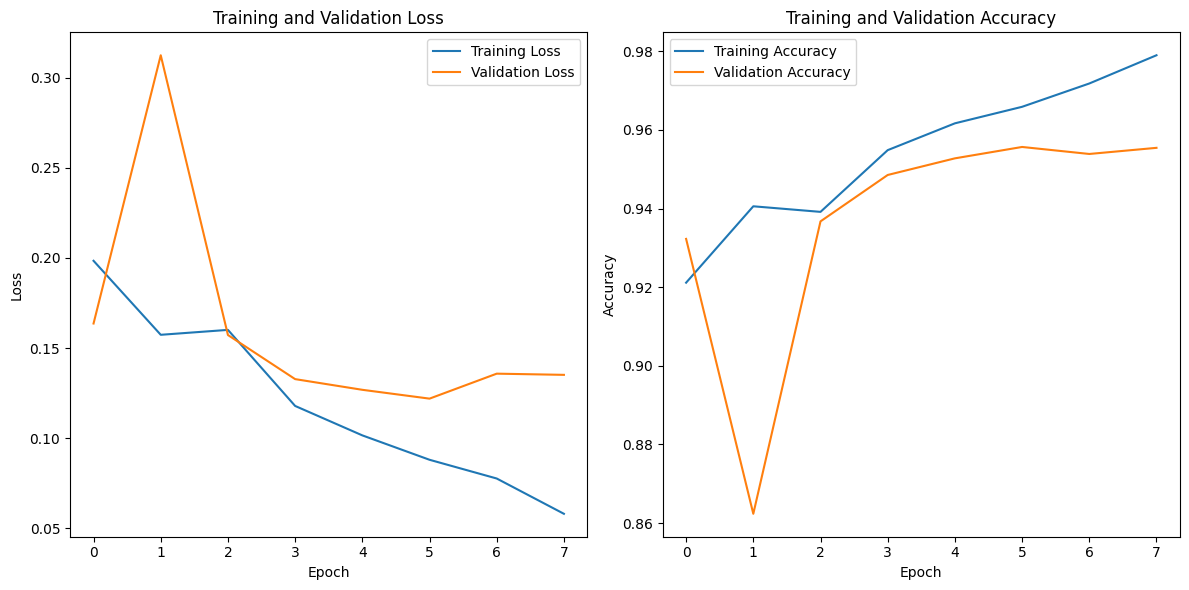

In [30]:
plt.figure(figsize = (12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

чуть лучше LSTM

## Предобученные эмбеддинги

In [34]:
! pip install sentence-transformers tf-keras

  Using cached tf_keras-2.20.1-py3-none-any.whl.metadata (1.8 kB)
Using cached tf_keras-2.20.1-py3-none-any.whl (1.7 MB)


In [35]:
from sentence_transformers import SentenceTransformer
from catboost import CatBoostClassifier

In [ ]:
model_emb = SentenceTransformer('all-MiniLM-L6-v2')

In [37]:

X_train_emb = model_emb.encode(X_train.tolist(), convert_to_numpy=True)
X_val_emb = model_emb.encode(X_val.tolist(), convert_to_numpy=True)
X_test_emb = model_emb.encode(X_test.tolist(), convert_to_numpy=True)

Learning rate set to 0.076749
0:	test: 0.8867222	best: 0.8867222 (0)	total: 434ms	remaining: 7m 13s
100:	test: 0.9759350	best: 0.9759350 (100)	total: 10.8s	remaining: 1m 36s
200:	test: 0.9832148	best: 0.9832148 (200)	total: 21s	remaining: 1m 23s
300:	test: 0.9859031	best: 0.9859031 (300)	total: 30.9s	remaining: 1m 11s
400:	test: 0.9873272	best: 0.9873333 (399)	total: 41.3s	remaining: 1m 1s
500:	test: 0.9882533	best: 0.9882533 (500)	total: 52.2s	remaining: 52s
600:	test: 0.9888156	best: 0.9888156 (600)	total: 1m 3s	remaining: 42.2s
700:	test: 0.9891936	best: 0.9892121 (672)	total: 1m 13s	remaining: 31.4s
800:	test: 0.9894043	best: 0.9894043 (800)	total: 1m 23s	remaining: 20.7s
900:	test: 0.9896229	best: 0.9896246 (899)	total: 1m 33s	remaining: 10.2s
999:	test: 0.9897771	best: 0.9897833 (991)	total: 1m 43s	remaining: 0us

bestTest = 0.9897833068
bestIteration = 991

Shrink model to first 992 iterations.


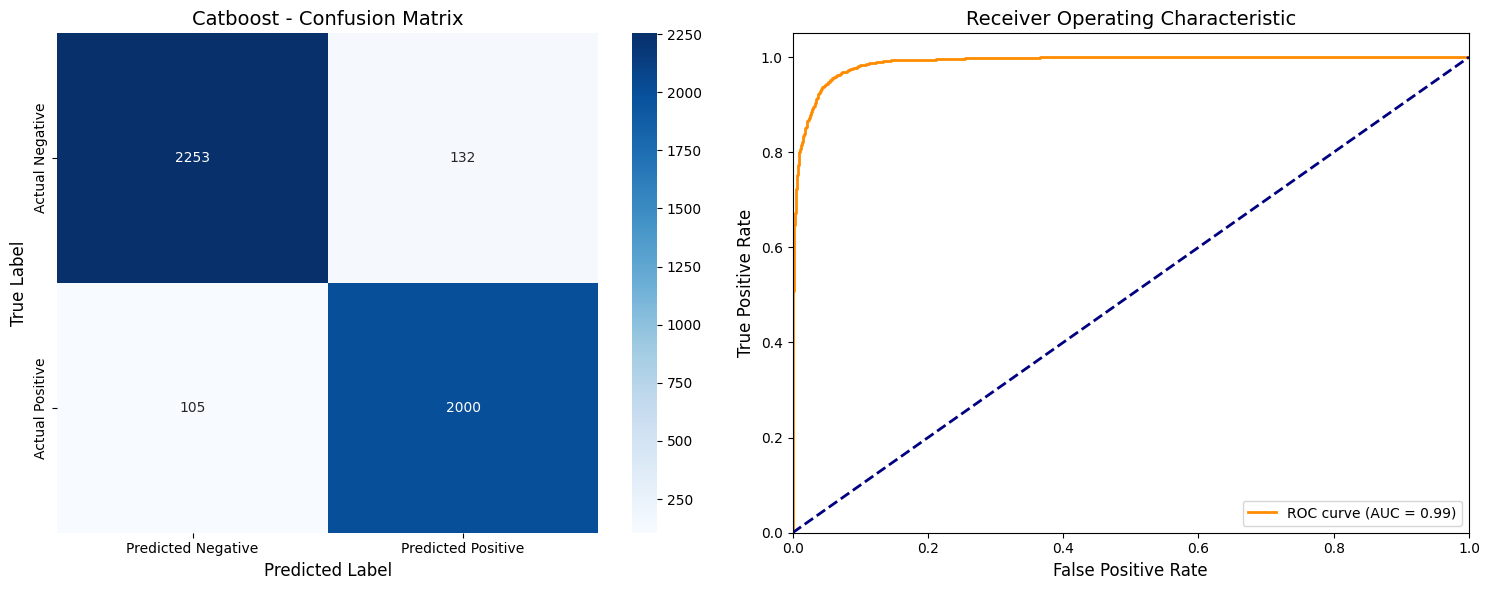


                    CATBOOST EVALUATION                     

MAIN METRICS:
           Metric  Value
          ROC AUC 0.9890
Average Precision 0.9871
         F1 Score 0.9470
        Precision 0.9468
           Recall 0.9474
         Accuracy 0.9472


CLASSIFICATION REPORT:
   Class  Precision   Recall
Positive   0.938086 0.950119
Negative   0.955471 0.944654



In [38]:
catboost = CatBoostClassifier(
    iterations=1000,
    depth=8,
    eval_metric='AUC',
    verbose=100,
    random_seed=SEED
)

catboost.fit(X_train_emb, y_train, eval_set=(X_val_emb, y_val))

y_pred = catboost.predict(X_test_emb)
y_probs = catboost.predict_proba(X_test_emb)[:, 1]  

metrics = evaluate_classification(
    y_test=y_test,
    y_pred=y_pred,
    y_probs=y_probs,
    model_name='Catboost',
    use_pr_curve=False
)

Где то на уровне LSTM